imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, VarianceThreshold, SequentialFeatureSelector

load data and convert dianosise to binary, whether applicant has ADHD or not

# Pearson r

In [ ]:
chunk_size = 10000
chunks = pd.read_csv("/content/drive/MyDrive/DM_project2/full_pearsonr.csv", chunksize=chunk_size)
df = pd.concat(chunks, ignore_index=True)
df["DX Binary"] = df["DX"].apply(lambda x: 0 if x==0 else 1)
value_columns = [col for col in df.columns if col.startswith('Value_')]
df = df.dropna(how='any')

In [ ]:
np.random.seed(42)

In [ ]:
X = df[value_columns].values
y = df["DX Binary"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Feature Selection

### threshold 0.7

In [ ]:
df_train = pd.DataFrame(X_train)
df_train["DX"] = y_train
df_pos = df_train[df_train["DX"] == 1]

In [ ]:
cols_to_keep = df_train.columns[df_pos.max() >= 0.7]

df_filtered = df_train[cols_to_keep]

X_train = df_filtered.drop("DX", axis = 1).values
y_train = df_filtered["DX"].values

Results without PCA

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

originalclass = []
predictedclass = []

def acc_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=50), SVC(gamma='auto'))
k_folds = KFold(n_splits = 5)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']:
  scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
  print(f"kernel {kernel}")
  print(classification_report(originalclass, predictedclass))

kernel linear
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       657
           1       0.00      0.00      0.00       411

    accuracy                           0.62      1068
   macro avg       0.31      0.50      0.38      1068
weighted avg       0.38      0.62      0.47      1068



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel poly
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1314
           1       0.00      0.00      0.00       822

    accuracy                           0.62      2136
   macro avg       0.31      0.50      0.38      2136
weighted avg       0.38      0.62      0.47      2136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel rbf
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1971
           1       0.00      0.00      0.00      1233

    accuracy                           0.62      3204
   macro avg       0.31      0.50      0.38      3204
weighted avg       0.38      0.62      0.47      3204



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel sigmoid
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      2628
           1       0.00      0.00      0.00      1644

    accuracy                           0.62      4272
   macro avg       0.31      0.50      0.38      4272
weighted avg       0.38      0.62      0.47      4272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel precomputed
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      3285
           1       0.00      0.00      0.00      2055

    accuracy                           0.62      5340
   macro avg       0.31      0.50      0.38      5340
weighted avg       0.38      0.62      0.47      5340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=0.7), AdaBoostClassifier())
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75      3942
           1       0.49      0.09      0.15      2466

    accuracy                           0.61      6408
   macro avg       0.55      0.51      0.45      6408
weighted avg       0.57      0.61      0.52      6408



In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=50), AdaBoostClassifier(n_estimators=1000))
k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73      5913
           1       0.48      0.20      0.28      3699

    accuracy                           0.61      9612
   macro avg       0.55      0.53      0.51      9612
weighted avg       0.57      0.61      0.56      9612



In [ ]:
clf = make_pipeline(AdaBoostClassifier(n_estimators=10000))
k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

### threshold 0.9

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
df_train = pd.DataFrame(X_train)
df_train["DX"] = y_train
df_pos = df_train[df_train["DX"] == 1]

In [ ]:
cols_to_keep = df_train.columns[df_pos.max() >= 0.9]

df_filtered = df_train[cols_to_keep]

X_train = df_filtered.drop("DX", axis = 1).values
y_train = df_filtered["DX"].values

Results without PCA

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

originalclass = []
predictedclass = []

def acc_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=50), SVC(gamma='auto'))
k_folds = KFold(n_splits = 5)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']:
  scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
  print(f"kernel {kernel}")
  print(classification_report(originalclass, predictedclass))

kernel linear
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       657
           1       0.00      0.00      0.00       411

    accuracy                           0.62      1068
   macro avg       0.31      0.50      0.38      1068
weighted avg       0.38      0.62      0.47      1068



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel poly
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1314
           1       0.00      0.00      0.00       822

    accuracy                           0.62      2136
   macro avg       0.31      0.50      0.38      2136
weighted avg       0.38      0.62      0.47      2136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel rbf
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1971
           1       0.00      0.00      0.00      1233

    accuracy                           0.62      3204
   macro avg       0.31      0.50      0.38      3204
weighted avg       0.38      0.62      0.47      3204



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel sigmoid
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      2628
           1       0.00      0.00      0.00      1644

    accuracy                           0.62      4272
   macro avg       0.31      0.50      0.38      4272
weighted avg       0.38      0.62      0.47      4272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kernel precomputed
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      3285
           1       0.00      0.00      0.00      2055

    accuracy                           0.62      5340
   macro avg       0.31      0.50      0.38      5340
weighted avg       0.38      0.62      0.47      5340



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=0.7), AdaBoostClassifier())
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76      3942
           1       0.55      0.08      0.14      2466

    accuracy                           0.62      6408
   macro avg       0.59      0.52      0.45      6408
weighted avg       0.60      0.62      0.52      6408



In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=50), AdaBoostClassifier(n_estimators=1000))
k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75      4599
           1       0.53      0.13      0.21      2877

    accuracy                           0.62      7476
   macro avg       0.58      0.53      0.48      7476
weighted avg       0.59      0.62      0.54      7476



### threshold < 0.3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
df_train = pd.DataFrame(X_train)
df_train["DX"] = y_train
df_pos = df_train[df_train["DX"] == 1]

,5912,8588,10922,11685,11821,13735,19333,23369,26439,27205,27414,32658,34140,38118,38560,47666,53447,57538
0,-0.099271,-0.223874,-0.297959,-0.270641,-0.158981,-0.540049,-0.386092,-0.227192,-0.441966,-0.300240,-0.037537,-0.456244,-0.084013,-0.076103,-0.287429,-0.197423,-0.454033,-0.572173
1,-0.135842,-0.460412,-0.521411,-0.307163,-0.079087,-0.085843,-0.330605,-0.175834,-0.292843,-0.435073,0.021445,0.072599,-0.447323,0.157486,-0.387449,-0.223897,-0.303061,-0.179782
2,-0.097438,-0.314016,-0.582606,-0.084738,-0.474696,-0.554577,-0.342444,-0.338354,-0.533088,-0.229060,-0.360909,-0.449154,-0.071275,-0.420493,0.140866,-0.140591,-0.175088,-0.327044
3,-0.197829,-0.303135,-0.477187,-0.264062,-0.569768,-0.481654,-0.664761,-0.394992,-0.208115,-0.455562,-0.170607,-0.690591,-0.409577,-0.727678,-0.118962,-0.028612,-0.532429,-0.590047
4,-0.472019,0.069853,-0.402986,0.079067,-0.331210,-0.128931,-0.097910,-0.038002,-0.684546,-0.036325,0.020594,-0.589153,-0.492878,-0.546766,-0.110584,-0.004709,-0.104268,-0.109208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-0.629685,-0.360947,-0.490405,-0.516341,-0.250042,-0.175130,-0.449024,-0.115298,-0.630513,-0.078601,-0.346850,-0.400305,-0.278779,-0.691730,-0.213691,-0.320003,-0.256196,-0.773324
1064,-0.352109,0.385941,-0.358237,0.012905,-0.251936,0.343806,0.079892,-0.160769,-0.314015,-0.160453,0.139814,-0.204205,-0.089216,-0.048757,-0.183755,-0.222847,-0.113133,0.131015
1065,-0.486853,-0.153085,-0.298272,-0.430698,-0.524819,-0.091877,-0.359274,0.094697,-0.552710,0.069454,-0.166773,-0.476168,-0.479547,-0.352645,0.274273,-0.166103,0.140902,-0.501821
1066,-0.492670,-0.416232,-0.489948,-0.371011,-0.509756,-0.588665,-0.364558,-0.341841,-0.423071,-0.268731,-0.356346,-0.459519,-0.388455,-0.537859,-0.189228,-0.163945,-0.074777,-0.424396


In [ ]:
df_filtered = df_train.loc[:,df_pos.max() < 0.3]
X_train = df_filtered.values

Results without PCA

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

originalclass = []
predictedclass = []

def acc_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
k_folds = KFold(n_splits = 5)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']:
  scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
  print(f"kernel {kernel}")
  print(classification_report(originalclass, predictedclass))

kernel linear
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       657
           1       0.52      0.21      0.30       411

    accuracy                           0.62      1068
   macro avg       0.58      0.55      0.52      1068
weighted avg       0.60      0.62      0.57      1068

kernel poly
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      1314
           1       0.52      0.21      0.30       822

    accuracy                           0.62      2136
   macro avg       0.58      0.55      0.52      2136
weighted avg       0.60      0.62      0.57      2136

kernel rbf
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      1971
           1       0.52      0.21      0.30      1233

    accuracy                           0.62      3204
   macro avg       0.58      0.55      0.52      3204
weighted avg       0.60      0.62    

In [ ]:
clf = make_pipeline(StandardScaler(), AdaBoostClassifier())
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      3942
           1       0.50      0.24      0.32      2466

    accuracy                           0.61      6408
   macro avg       0.57      0.54      0.53      6408
weighted avg       0.59      0.61      0.57      6408



In [ ]:
clf = make_pipeline(AdaBoostClassifier(n_estimators=1000))
k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      4599
           1       0.48      0.26      0.34      2877

    accuracy                           0.61      7476
   macro avg       0.56      0.54      0.53      7476
weighted avg       0.58      0.61      0.57      7476



# cosine

In [ ]:
chunk_size = 10000
chunks = pd.read_csv("/content/drive/MyDrive/DM_project2/full_cosine_similarity.csv", chunksize=chunk_size)
df = pd.concat(chunks, ignore_index=True)
df["DX Binary"] = df["DX"].apply(lambda x: 0 if x==0 else 1)
value_columns = [col for col in df.columns if col.startswith('Value_')]
df = df.dropna(how='any')

In [ ]:
np.random.seed(42)

In [ ]:
X = df[value_columns].values
y = df["DX Binary"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Feature Selection

## variance threshold

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
df_train = pd.DataFrame(X_train)
df_train["DX"] = y_train

# Calculate standard deviation for the entire dataset
std_overall = df_train.std()

# Calculate standard deviation for each label group
std_pos, std_neg = df_train.groupby('DX').std().to_numpy()

# Create histograms using Plotly Graph Objects
fig = go.Figure()

# Add histogram for overall standard deviation
fig.add_trace(go.Histogram(
    x=std_overall,
    name='Overall Standard Deviation',
))

# Add histogram for standard deviation by label
fig.add_trace(go.Histogram(
    x=std_pos,
    name='ADHD Positive Standard Deviation',
))


# Add histogram for standard deviation by label
fig.add_trace(go.Histogram(
    x=std_neg,
    name='ADHD Negative Standard Deviation',
))

# Update layout
fig.update_layout(
    title='Histogram of Standard Deviations',
    xaxis_title='Standard Deviation',
    yaxis_title='Frequency'
)

fig.update_traces(opacity=0.75)

fig.show()


In [ ]:
df_train = pd.DataFrame(X_train)
df_train["DX"] = y_train

# Calculate standard deviation for the entire dataset
std_overall = df_train.mean()

# Calculate standard deviation for each label group
std_pos, std_neg = df_train.groupby('DX').mean().to_numpy()

# Create histograms using Plotly Graph Objects
fig = go.Figure()

# Add histogram for overall standard deviation
fig.add_trace(go.Histogram(
    x=std_overall,
    name='Overall Mean',
))

# Add histogram for standard deviation by label
fig.add_trace(go.Histogram(
    x=std_pos,
    name='ADHD Positive Mean',
))


# Add histogram for standard deviation by label
fig.add_trace(go.Histogram(
    x=std_neg,
    name='ADHD Negative Mean',
))

# Update layout
fig.update_layout(
    title='Histogram of Means',
    xaxis_title='Mean',
    yaxis_title='Frequency'
)

fig.update_traces(opacity=0.75)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_train = pd.DataFrame(X_train)
df_train["DX"] = y_train

# Calculate mean for the entire dataset
mean_overall = df_train.mean().to_numpy()

# Calculate mean for each label group
mean_by_label = df_train.groupby('DX').mean().reset_index()

# Create line plots using Plotly Graph Objects
fig = go.Figure()

# Add plot for overall mean
fig.add_trace(go.Scatter(
    y=mean_overall,
    mode='markers',
    name='Overall Mean'
))

# Add line plots for mean by label
for label in mean_by_label['DX'].unique():
    mean_values = mean_by_label[mean_by_label['DX'] == label].iloc[0, 1:].to_numpy()
    fig.add_trace(go.Scatter(
        y=mean_values,
        mode='markers',
        name=f'Mean for {label}'
    ))

# Update layout
fig.update_layout(
    title='Line Plot of Means',
    xaxis_title='Feature Index',
    yaxis_title='Mean',
    width=2000
)

fig.show()


In [ ]:
sel = VarianceThreshold(threshold=(0.104))
_ = sel.fit_transform(X_train)

In [ ]:
len(_[0])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

originalclass = []
predictedclass = []

def acc_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [ ]:
clf = make_pipeline(VarianceThreshold(threshold=(0.103)), StandardScaler(), SVC(gamma='auto'))
k_folds = KFold(n_splits = 10)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  originalclass = []
  predictedclass =[]
  clf.set_params(svc__kernel=kernel)
  scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
  print(f"kernel {kernel}")
  print(classification_report(originalclass, predictedclass))

In [ ]:
clf = make_pipeline(VarianceThreshold(threshold=(0.103)), AdaBoostClassifier(n_estimators=1000))
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

In [ ]:
from sklearn.metrics import classification_report, f1_score, make_scorer

originalclass = []
predictedclass = []

def f_1_score(y_true, y_pred):
    f1  = f1_score((y_true, y_pred))
    print(f1)
    return f1

model = SVC(gamma='auto', kernel="rbf")

sfs = SequentialFeatureSelector(model, direction="backward", n_features_to_select=32, scoring=make_scorer(f_1_score), cv=10, n_jobs=-1)
sfs.fit(X_train, y_train)
sfs.get_support()
sfs.transform(X).shape

In [ ]:
from sklearn.datasets import load_digits

from sklearn.feature_selection import SelectKBest, mutual_info_classif

X_new = SelectKBest(mutual_info_classif, k=30).fit_transform(X_train, y_train)

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
k_folds = KFold(n_splits = 10)
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  originalclass = []
  predictedclass =[]
  clf.set_params(svc__kernel=kernel)
  cross_val_score(clf, X_new, y_train, cv=k_folds, scoring=make_scorer(acc_score))
  print(f"kernel {kernel}")
  print(classification_report(originalclass, predictedclass))

### threshold 0.9

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
df_train = pd.DataFrame(X_train)
df_train["DX"] = y_train
df_pos = df_train[df_train["DX"] == 1]

In [ ]:
cols_to_keep = df_train.columns[df_pos.max() >= 0.9]

df_filtered = df_train[cols_to_keep]

X_train = df_filtered.drop("DX", axis = 1).values
y_train = df_filtered["DX"].values

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

originalclass = []
predictedclass = []

def acc_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=30), SVC(gamma='auto'))
k_folds = KFold(n_splits = 10)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  originalclass = []
  predictedclass = []
  clf.set_params(svc__kernel=kernel)
  scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
  print(f"kernel {kernel}")
  print(classification_report(originalclass, predictedclass))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 462, in fit_transform
    U, S, Vt = self._fit(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 512, in _fit
    return self._fit_full(X, n_components)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 526, in _fit_full
    raise ValueError(
ValueError: n_components=30 must be between 0 and min(n_samples, n_features)=19 with svd_solver='full'


In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=30), AdaBoostClassifier())
k_folds = KFold(n_splits = 5)
originalclass = []
predictedclass = []
scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       657
           1       0.54      0.45      0.49       411

    accuracy                           0.64      1068
   macro avg       0.61      0.60      0.61      1068
weighted avg       0.63      0.64      0.63      1068



In [ ]:
clf = make_pipeline(StandardScaler(), PCA(n_components=30), AdaBoostClassifier(n_estimators=1000))
k_folds = KFold(n_splits = 10)
originalclass = []
predictedclass = []
scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       657
           1       0.50      0.49      0.49       411

    accuracy                           0.61      1068
   macro avg       0.59      0.59      0.59      1068
weighted avg       0.61      0.61      0.61      1068



### threshold < 0.3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
df_train = pd.DataFrame(X_train)
df_train["DX"] = y_train
df_pos = df_train[df_train["DX"] == 1]

In [ ]:
df_filtered = df_train.loc[:,df_pos.max() < 0.3]
X_train = df_filtered.values

Results without PCA

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

originalclass = []
predictedclass = []

def acc_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
k_folds = KFold(n_splits = 10)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
  originalclass = []
  predictedclass = []
  clf.set_params(svc__kernel=kernel)
  scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
  print(f"kernel {kernel}")
  print(classification_report(originalclass, predictedclass))

kernel linear
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       657
           1       0.00      0.00      0.00       411

    accuracy                           0.62      1068
   macro avg       0.31      0.50      0.38      1068
weighted avg       0.38      0.62      0.47      1068



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



kernel poly
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       657
           1       0.51      0.14      0.21       411

    accuracy                           0.62      1068
   macro avg       0.57      0.53      0.48      1068
weighted avg       0.58      0.62      0.54      1068

kernel rbf
              precision    recall  f1-score   support

           0       0.64      0.89      0.75       657
           1       0.54      0.22      0.31       411

    accuracy                           0.63      1068
   macro avg       0.59      0.55      0.53      1068
weighted avg       0.60      0.63      0.58      1068

kernel sigmoid
              precision    recall  f1-score   support

           0       0.64      0.84      0.73       657
           1       0.49      0.24      0.32       411

    accuracy                           0.61      1068
   macro avg       0.56      0.54      0.52      1068
weighted avg       0.58      0.61   

In [ ]:
clf = make_pipeline(StandardScaler(), AdaBoostClassifier())
k_folds = KFold(n_splits = 10)
originalclass = []
predictedclass = []
scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       657
           1       0.44      0.34      0.38       411

    accuracy                           0.58      1068
   macro avg       0.54      0.53      0.53      1068
weighted avg       0.56      0.58      0.57      1068



In [ ]:
clf = make_pipeline(AdaBoostClassifier(n_estimators=1000))
k_folds = KFold(n_splits = 10)
originalclass = []
predictedclass = []
scores = cross_val_score(clf, X_train, y_train, cv = k_folds, scoring=make_scorer(acc_score))
print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       657
           1       0.42      0.39      0.40       411

    accuracy                           0.56      1068
   macro avg       0.53      0.53      0.53      1068
weighted avg       0.55      0.56      0.55      1068



# gkgjidlrg


In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.01)  # You can adjust the contamination parameter

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(reduced_X_train)

# outliers will be -1 for outliers and 1 for inliers
X_train = X_train[outliers == 1]
y_train = y_train[outliers == 1]

ValueError: Item wrong length 1068 instead of 1057.

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424
0,-0.217771,0.219976,-0.311117,-0.105639,-0.031800,-0.195679,0.032258,-0.366493,-0.102885,-0.075994,...,0.245809,0.001382,0.210416,-0.295545,0.077534,0.119874,-0.355327,0.009499,-0.110484,-0.291682
1,-0.125420,0.179202,-0.439439,-0.347525,0.082219,0.058053,0.061742,-0.240933,-0.181288,0.142882,...,0.197900,-0.384311,-0.239563,-0.330903,0.061686,-0.053294,0.067745,0.053672,0.162896,0.070828
2,0.058445,-0.226076,-0.348370,-0.051870,-0.430912,-0.088372,-0.215116,-0.476935,-0.159931,-0.236266,...,0.168910,-0.406606,-0.044528,0.070883,0.005410,0.108681,-0.097471,0.030554,-0.122741,-0.200056
3,-0.038701,-0.065669,0.398023,-0.533603,-0.218332,-0.288784,0.581613,0.273380,-0.249917,0.331137,...,0.436365,0.031487,-0.180449,-0.529496,0.303366,-0.442334,-0.542190,-0.233313,-0.443369,0.422735
4,-0.010576,0.000473,-0.545454,0.298476,-0.123436,0.020650,-0.246590,-0.070310,-0.245427,0.175508,...,0.045346,0.037627,-0.161021,0.060584,-0.107598,0.000982,0.414688,-0.133554,0.233940,-0.001477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-0.044416,-0.183126,-0.482712,-0.361347,-0.243067,0.013515,-0.262321,-0.525140,-0.231079,-0.490732,...,0.164843,-0.291973,0.147283,0.100943,-0.139093,0.048178,-0.002710,-0.196751,-0.251089,0.327691
1064,0.089433,0.054808,-0.279374,0.142861,-0.024279,-0.169462,-0.204918,-0.070354,-0.282310,-0.164701,...,-0.004254,0.008048,-0.104236,-0.386720,-0.048127,0.065293,-0.113811,0.121005,0.188378,0.117220
1065,0.190098,-0.576759,-0.401927,-0.142705,-0.415298,-0.242855,0.275775,-0.019439,-0.311595,-0.123146,...,-0.146874,-0.138322,0.253209,0.210140,-0.035405,0.230006,0.157554,0.061918,-0.245159,0.209914
1066,0.134570,0.525028,-0.264109,0.569866,-0.283522,-0.367441,0.018657,-0.043106,-0.132914,-0.468502,...,-0.484326,-0.045420,0.572450,0.299148,0.104618,-0.457630,-0.250904,0.187824,0.041667,0.131840


kernel linear acc: 0.7058823529411765
kernel poly acc: 0.7058823529411765


KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
for kernel in ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']:
  clf.fit(X_train, y_train)
  print(f"kernel {kernel} acc: {clf.score(X_test, y_test)}")

kernel linear acc: 0.7058823529411765
kernel poly acc: 0.7058823529411765
kernel rbf acc: 0.7058823529411765


KeyboardInterrupt: 

In [ ]:
clf = AdaBoostClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
X_train = reduced_X_train[outliers == 1]
clf = AdaBoostClassifier()
clf = clf.fit(X_train, y_train)
X_test = pca.transform(X_test)
clf.score(X_test, y_test)

0.6302521008403361

In [ ]:
clf = AdaBoostClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
pca = PCA(n_components=50)
reduced_X_train = pca.fit_transform(X_train)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5378151260504201

calculate and plot f scores

In [ ]:
X = df[value_columns].values
y = df["DX Binary"].values
selector = SelectKBest(f_classif, k=50)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

plot scores

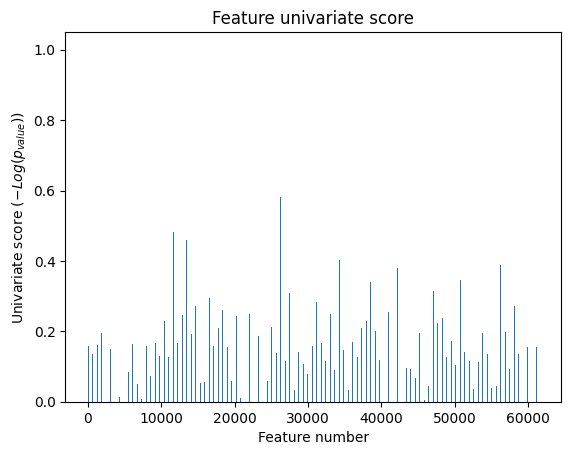

In [ ]:
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

train test val split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Train a sample classifier

In [ ]:
clf_selected = make_pipeline(SelectKBest(f_classif, k=10000), MinMaxScaler(), AdaBoostClassifier())
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

Classification accuracy after univariate feature selection: 0.658


In [ ]:
clf_selected.score(X_train, y_train)

0.9061855670103093

In [ ]:
clf_selected.score(X_val, y_val)

0.6296296296296297

With experiementing different classifiers with a constant number of k, we can do not see significant improvement in performance. All of them ar e between 50 to 70.
Changing the k in svm classifier shows that the accurracy also falls into same span.
To justify these observation, i will plot mutual information between correlations.

In [ ]:
X = df[value_columns].values
y = df["DX Binary"].values
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.01099217, 0.05444723, 0.04229846, ..., 0.02751921, 0.02309387,
       0.        ])

In [ ]:
mutual_info.max()

0.09109103460612333

In [ ]:
import plotly.express as px
px.histogram(mutual_info)

Removing features can not be done using mutual information, as maximum mutual information is 0.1, which is quite insignificant. Therefore, using top k features with f1 score did not benefited the model accuracy by large, as the chosen features did not have significant difference with others in terms of mutual information.

# PCA

scale data

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

fit a pca on training set

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.8)
X_train = pca.fit_transform(X_train)

In [ ]:
X_test = pca.transform(X_test)

Train a classifier on the transformed data.

In [ ]:
clf = AdaBoostClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6083333333333333

Still no performance improvement can be seen.